<a href="https://colab.research.google.com/github/Carocschall/CoderHouse/blob/main/TF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final - CODERHOUSE

Alumna: Carolina Cortez Schall

COMISION 60935

Tema: Calidad del vino


# Características de la composición del vino

***Resúmen***

La producción vitivinícola conlleva una serie de desafíos a tener en cuenta, frente al vertiginoso crecimiento de la comercialización y exportación de vinos de calidad. Por lo cual la calidad se constituye como el objeto de estudio frente a la satisfacción de necesidades y exigencias del público consumidor de vinos.
Es de común conocimiento que, la búsqueda de la calidad se relaciona directamente y proporcialmente con el valor económico que implica, así como la demanda que este provoca. El sujeto consumidor realiza una búsqueda y valoración de vinos de calidad, potenciando la exigencia, además de la experticia de quien consume desde un lugar de mayor conocimiento.
Por esto mismo, es menester la valoración y análisis frente a las característcias y componentes que son parte de la producción del vino, para el aseguramiento de la calidad del producto final de consumo.

***Objetivo***

El objetivo principal de este estudio es identificar y analizar las relaciones entre los niveles de acidez y la calidad del vino, para una mejora del producto final de consumo.

***Contexto Comercial***

El mercado vitivinícola se encuentra frente a un crecimiento constante a nivel mundial. La cultura popular y de disfrute en un entorno de experimentar los diversos placeres de la vida, lleva a un consumo mayor del vino como un producto de valor frente al disfrute y la salud.

Se trabaja con la información necesaria desde la categorización "calidad" de vinos y sus diversos componentes que intervienen en ella, modificándola en relación a su mejora o disminución de calidad del mismo.

***Desafío Comercial***

Conocer de qué manera influye los niveles de acidificación en la producción del vino para la obtención de un vino de mayor calidad.

***Preguntas de análisis***

1. ¿Cómo influye la la acidez en la calidad del vino?

2. ¿El ph del vino se relaciona directamente con la calidad del mismo?

3. ¿Qué tipo de acidez afecta más la calidad de vino?

4. La acidez del vino determina la graduación etílica?



***Hipótesis***

1. Tener una mayor acidez provoca mayor calidad del vino.

2. El ph del vino presenta relación con la calidad del vino.

3. El ácido cítrico tiene mayor impacto positivo en la mejora de la calidad del vino.

4. La graduación etílica se encuentra determinado por la acidez del vino.

# Importaciones

In [60]:
#Importación de librerías para análisis
import pandas as pd
import numpy as np

#Archivo de datos
url='https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(url,sep=',', header=None)
df.head()

# Importación de librerias para visualizacion
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Importación de librerias para machine learning
from numpy import nan
from numpy import isnan
from pandas import read_csv
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [61]:
# prompt: Con DataFrame df: df_archivo

df_archivo = df.rename(columns={0: 'AF', 1: 'AV', 2: 'AC', 3: 'AR', 4: 'CL', 5: 'DSL', 6: 'DST', 7: 'DEN', 8: 'PH', 9: 'SUL', 10: 'ALC', 11: 'CAL', 12: 'ID'})
df_archivo

,AF,AV,AC,AR,CL,DSL,DST,DEN,PH,SUL,ALC,CAL,ID
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,6.3,0.51,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1140,6.8,0.62,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1141,6.2,0.6,0.08,2.0,0.09,32.0,44.0,0.9949,3.45,0.58,10.5,5,1594
1142,5.9,0.55,0.1,2.2,0.062,39.0,51.0,0.9951200000000001,3.52,0.76,11.2,6,1595


# Descripción de variables incorporadas

**Variables incorporadas - Conceptualización**

0. ***Acidez Fija***

Conjunto de ácidos naturales del vino que ya hemos visto anteriormente (tartárico, málico, cítrico, succínico y láctico) (AF).

1. ***Acidez Volátil***

Cantidad de ácido acético del vino. La medida normal es de 0,3 a 0,6 gramos por litro. Cuanto menor acidez volátil tenga un vino mayor será la calidad (AV).

2. ***Acidez Cítrica***

Es el ácido menos común en el vino, produce una sensación de acidez muy fresca y brillante en el paladar (AC).

3. ***Azúcar Residual***

Es lo que queda después de que las uvas hayan pasado por el proceso de elaboración del vino (AR).

4. ***Cloruros***

Uno de los principales componentes de las sales en el vino son los cloruros, las sales minerales en el vino producen en organismo placer organoléptico, favorecen la hidratación, resalta sabores de los alimentos (mg/L.(CL).

5. ***Dióxido Sulfúrico Libre***

El SO2 se añade durante la elaboración del vino como conservante, lo que permite obtener vinos con menor oxidación al inhibir la reacción del oxígeno gracias a su capacidad reductora. Esto mejora las propiedades organolépticas del vino, realzando su sabor, color y aroma(DSL).

6. ***Dióxido Sulfúrico Total***

El Dióxido de azufre se usa para preservar el color, sabor y estabilidad del vino. Al ser un antimicrobiano, el SO2 interfiere con los caminos metabólicos de la levadura y bacterias (DST).

7. ***Densidad***

En los vinos, el azúcar se ha transformado en alcohol, cuya densidad es 0,798 (DEN).

8. ***Grado de acidez o alcalinidad***

La mayoría de los vinos tienen un valor de pH entre 3.0 y 4.0 (PH).

9. ***Sulfatos***

Los sulfitos del vino se utilizan para detener la fermentación en un punto específico del proceso de elaboración vinícola. Además, son conservantes que previenen el deterioro y la oxidación, y brindan protección contra las bacterias (SUL).

10. ***Alcohol***

En el caso de los vinos, cabe destacar que, según indica la legislación vigente, su graduación mínima será de 9% vol (ALC).

11. ***Calidad***

Combinación de los componentes anteriores (CAL).

12. ***Identificación***

Identificador del producto analizado en sus componentes (ID).

# ANÁLISIS EXPLORATORIO DE DATOS (EDA)

In [62]:
#Información sobre el tipo de datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       1144 non-null   object
 1   1       1144 non-null   object
 2   2       1144 non-null   object
 3   3       1144 non-null   object
 4   4       1144 non-null   object
 5   5       1144 non-null   object
 6   6       1144 non-null   object
 7   7       1144 non-null   object
 8   8       1144 non-null   object
 9   9       1144 non-null   object
 10  10      1144 non-null   object
 11  11      1144 non-null   object
 12  12      1144 non-null   object
dtypes: object(13)
memory usage: 116.3+ KB


A partir de la información aportada, puede conocerse las 12 columnas con tipos de datos "object", los cuales transformaremos en "categóricos para un mejor cruce de los mismos y ahorrar memoria.

In [64]:
# Conversión de columnas en tipo de datos categóricos
category_indexes = [0,1,2,3,4,5,6,7,8,9,10,11,12]
df[df.columns[category_indexes]] = df[df.columns[category_indexes]].astype('category')

In [65]:
#Resultado del cambio
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   0       1144 non-null   category
 1   1       1144 non-null   category
 2   2       1144 non-null   category
 3   3       1144 non-null   category
 4   4       1144 non-null   category
 5   5       1144 non-null   category
 6   6       1144 non-null   category
 7   7       1144 non-null   category
 8   8       1144 non-null   category
 9   9       1144 non-null   category
 10  10      1144 non-null   category
 11  11      1144 non-null   category
 12  12      1144 non-null   category
dtypes: category(13)
memory usage: 107.0 KB


In [66]:
# Indexación y posición de datos. En este caso en la posición 5 para tener un
# panorama aleatorio en la exploración de datos
df.iloc[4]

0      11.2
1      0.28
2      0.56
3       1.9
4     0.075
5      17.0
6      60.0
7     0.998
8      3.16
9      0.58
10      9.8
11        6
12        3
Name: 4, dtype: object

In [67]:
# Nombres de las columnas a partir de la posición
df.iloc[0]

0            fixed acidity
1         volatile acidity
2              citric acid
3           residual sugar
4                chlorides
5      free sulfur dioxide
6     total sulfur dioxide
7                  density
8                       pH
9                sulphates
10                 alcohol
11                 quality
12                      Id
Name: 0, dtype: object

In [68]:
# Tamaño de la base de datos
df.shape

(1144, 13)

In [69]:
# Columnas de la base de datos
df.columns

Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64')

In [70]:
# Tipos de datos finales
df.dtypes

0     category
1     category
2     category
3     category
4     category
5     category
6     category
7     category
8     category
9     category
10    category
11    category
12    category
dtype: object

In [71]:
# renombramos las columnas
df= df.rename(columns={0: "AF", 1: "AV", 2: "AC",3:"AR",4:"CL",5:"DSL",6:"DST",7:"DEN",8:"PH",9:"SUL",10:"ALC",11:"CAL",12:"ID"})
df.head()

,AF,AV,AC,AR,CL,DSL,DST,DEN,PH,SUL,ALC,CAL,ID
0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
1,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.2,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.998,3.16,0.58,9.8,6,3


In [72]:
if 'citric acid' in df.columns:
    # Set the index to the 'citric acid' column
    df.index = df['citric acid']

In [73]:
y = df.sum(axis='columns')
y

0       fixed acidityvolatile aciditycitric acidresidu...
1            7.40.70.01.90.07611.034.00.99783.510.569.450
2            7.80.880.02.60.09825.067.00.99683.20.689.851
3           7.80.760.042.30.09215.054.00.9973.260.659.852
4          11.20.280.561.90.07517.060.00.9983.160.589.863
                              ...                        
1139    6.30.510.132.30.07629.040.00.995743.420.7511.0...
1140    6.80.620.081.90.06828.038.00.996513.420.829.56...
1141     6.20.60.082.00.0932.044.00.99493.450.5810.551594
1142    5.90.550.12.20.06239.051.00.99512000000000013....
1143    5.90.6450.122.00.07532.044.00.9954700000000001...
Length: 1144, dtype: object

In [74]:
# Indexación de la columna de ID
# Verificar si la carga de datos es correcta y comprender la estructura y el contenido del DataFrame.
file_path = 'https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(file_path, index_col=12)
df_archivo=df
df_archivo.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
Id,,,,,,,,,,,,
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [75]:
# Análisis estadístico de las columnas, redondeando en un decimal
df_archivo.describe().round(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0
mean,8.3,0.5,0.3,2.5,0.1,15.6,45.9,1.0,3.3,0.7,10.4,5.7
std,1.7,0.2,0.2,1.4,0.0,10.3,32.8,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,21.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.2,2.2,0.1,13.0,37.0,1.0,3.3,0.6,10.2,6.0
75%,9.1,0.6,0.4,2.6,0.1,21.0,61.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,68.0,289.0,1.0,4.0,2.0,14.9,8.0


In [76]:
# El resultado será un resumen estadístico de las columnas transpuestas, lo que significa que ahora estás obteniendo estadísticas para cada fila original del DataFrame
df_archivo.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [77]:
# Resúmen estadístico de las columnas, redondeando en un decimal
resumen=df.describe().round(1)
resumen

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0,1143.0
mean,8.3,0.5,0.3,2.5,0.1,15.6,45.9,1.0,3.3,0.7,10.4,5.7
std,1.7,0.2,0.2,1.4,0.0,10.3,32.8,0.0,0.2,0.2,1.1,0.8
min,4.6,0.1,0.0,0.9,0.0,1.0,6.0,1.0,2.7,0.3,8.4,3.0
25%,7.1,0.4,0.1,1.9,0.1,7.0,21.0,1.0,3.2,0.6,9.5,5.0
50%,7.9,0.5,0.2,2.2,0.1,13.0,37.0,1.0,3.3,0.6,10.2,6.0
75%,9.1,0.6,0.4,2.6,0.1,21.0,61.0,1.0,3.4,0.7,11.1,6.0
max,15.9,1.6,1.0,15.5,0.6,68.0,289.0,1.0,4.0,2.0,14.9,8.0


In [78]:
# Serie que muestra el número de valores faltantes en cada columna del DataFrame
print(df.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [79]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [80]:
# Suma de datos por columna
df_archivo.sum()

fixed acidity            9499.600000
volatile acidity          607.320000
citric acid               306.740000
residual sugar           2894.250000
chlorides                  99.364000
free sulfur dioxide     17848.500000
total sulfur dioxide    52480.500000
density                  1139.262860
pH                       3784.490000
sulphates                 751.760000
alcohol                 11935.333333
quality                  6466.000000
dtype: float64

In [81]:
#suma de datos por fila (0)
df_archivo.mean()

fixed acidity            8.311111
volatile acidity         0.531339
citric acid              0.268364
residual sugar           2.532152
chlorides                0.086933
free sulfur dioxide     15.615486
total sulfur dioxide    45.914698
density                  0.996730
pH                       3.311015
sulphates                0.657708
alcohol                 10.442111
quality                  5.657043
dtype: float64

In [82]:
#suma de datos por columna (1)
df_archivo.sum(axis='columns')

Id
0        74.54380
1       123.05480
2        99.69900
3       111.55300
4        74.54380
          ...    
1592    100.48174
1593     96.20451
1594    105.49490
1595    121.28712
1597    105.21547
Length: 1143, dtype: float64

In [83]:
# Suma de valores agrupados de las columnas relacionadas a la acidificación del vino y su calidad
# Muestra las primeras 15 filas del resultado
df.groupby('quality')[['fixed acidity','volatile acidity','citric acid']].sum().head(15)

,fixed acidity,volatile acidity,citric acid
quality,,,
3,50.7,5.385,1.27
4,257.7,23.100,5.47
5,3941.8,282.690,115.98
6,3842.8,233.290,121.82
7,1265.7,56.295,55.28
8,140.9,6.560,6.92


In [84]:
# Promedio o media aritmética de los valores pertenecientes a la acidificación del vino respecto a la calidad del mismo
df_archivo.groupby('quality')[['fixed acidity','volatile acidity','citric acid']].mean().head(15)

,fixed acidity,volatile acidity,citric acid
quality,,,
3,8.450000,0.897500,0.211667
4,7.809091,0.700000,0.165758
5,8.161077,0.585280,0.240124
6,8.317749,0.504957,0.263680
7,8.851049,0.393671,0.386573
8,8.806250,0.410000,0.432500


In [85]:
# Cálculo estadístico descriptivo para las columnas 'fixed acidity', 'volatile acidity' y 'citric acid'
# dentro de cada grupo de calidad del vino
df_archivo.groupby('quality')[['fixed acidity','volatile acidity','citric acid']].describe()

fixed acidity                                                     \
                count      mean       std  min   25%   50%     75%   max   
quality                                                                    
3                 6.0  8.450000  2.032486  6.7  7.15  7.45   9.700  11.6   
4                33.0  7.809091  1.685668  4.6  6.70  7.60   8.500  12.5   
5               483.0  8.161077  1.557746  5.0  7.10  7.80   8.900  15.9   
6               462.0  8.317749  1.771585  5.0  7.00  7.90   9.275  14.3   
7               143.0  8.851049  2.105187  4.9  7.40  8.70  10.100  15.6   
8                16.0  8.806250  2.089168  5.0  7.35  8.85  10.400  12.6   

        volatile acidity            ...                citric acid            \
                   count      mean  ...      75%   max       count      mean   
quality                             ...                                        
3                    6.0  0.897500  ...  0.95375  1.58         6.0  0.211667   
4                   33.0  0.700000  ...  0.88000  1.09        33.0  0.165758   
5                  483.0  0.585280  ...  0.68000  1.33       483.0  0.240124   
6                  462.0  0.504957  ...  0.60875  1.04       462.0  0.263680   
7                  143.0  0.393671  ...  0.48000  0.84       143.0  0.386573   
8                   16.0  0.410000  ...  0.42000  0.85        16.0  0.432500   

                                                      
              std   min     25%    50%     75%   max  
quality                                               
3        0.287153  0.00  0.0275  0.050  0.3800  0.66  
4        0.211335  0.00  0.0300  0.070  0.2400  1.00  
5        0.179700  0.00  0.0900  0.230  0.3500  0.79  
6        0.195371  0.00  0.0800  0.245  0.4200  0.74  
7        0.197812  0.00  0.3200  0.400  0.5050  0.76  
8        0.168977  0.05  0.3250  0.455  0.5325  0.72  

[6 rows x 24 columns]

In [86]:
# conteo del numero de valores que son 0 por columnas
nun_missing = (df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "density", "sulphates", "alcohol", "quality", "pH"]]== 0).sum()
print(nun_missing)

fixed acidity        0
volatile acidity     0
citric acid         99
residual sugar       0
chlorides            0
density              0
sulphates            0
alcohol              0
quality              0
pH                   0
dtype: int64


In [87]:
# replace '0' values with 'nan'
df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "density", "sulphates", "alcohol", "quality", "pH"]] = df[["fixed acidity", "volatile acidity", "citric acid", "residual sugar", "chlorides", "density", "sulphates", "alcohol", "quality", "pH"]].replace(0, np.nan)
# count the number of nan values in each column
print(df.isnull().sum())

fixed acidity            0
volatile acidity         0
citric acid             99
residual sugar           0
chlorides                0
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       0
sulphates                0
alcohol                  0
quality                  0
dtype: int64


In [88]:
# Completamiento de los valores faltantes con la media de cada columna
!pip install scikit-learn
from sklearn.impute import SimpleImputer
url='https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(url,sep=',', header=None)
df=df.replace(0, np.nan)
print(df.shape)
print(df.head())

(1144, 13)
              0                 1            2               3          4   \
0  fixed acidity  volatile acidity  citric acid  residual sugar  chlorides   
1            7.4               0.7          0.0             1.9      0.076   
2            7.8              0.88          0.0             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   

                    5                     6        7     8          9   \
0  free sulfur dioxide  total sulfur dioxide  density    pH  sulphates   
1                 11.0                  34.0   0.9978  3.51       0.56   
2                 25.0                  67.0   0.9968   3.2       0.68   
3                 15.0                  54.0    0.997  3.26       0.65   
4                 17.0                  60.0    0.998  3.16       0.58   

        10       11  12  
0  alcohol  quality  Id  
1      9.4        5   0

Observación

Si bien el df no presenta datos faltantes como se evidencia al inicio de este trabajo, me pareció interesante ver las posibilidades de resolución, a modo de entrenamiento en este curso.


# VISUALIZACIÓN DE DATOS

Se busca analizar y comprender el comportamiento en la producción del vino, de las variables que intervienen en ella. Nos focalizaremos sobre la acidificación del vino y su vinculación o impacto en la calidad final del mismo.

Para esto buscamos cruzar las variables de acidez fija, acidez volátil y ácido cítrico, así como también el nivel de acidez o alcalinidad del producto (PH). Por último, queremos indagar sobre la relación entre el nivel etílico y la calidad del vino, para conocer alguna relación directa o indirecta.

Para esto, trabajaremos algunos instrumentos de visualización que faciliten la comprensión del comportamiento de las variables que afectan a la producción final del vino desde su calidad.

In [89]:
# Uso del estilo seaborn en Matplotlib
mpl.style.use('seaborn')

<ipython-input-89-84818b3888c9>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


In [90]:
# Indexación de la columna 'quality' en el DataFrame
df_archivo.index = df_archivo['quality']
df_archivo = df_archivo.drop('quality', axis='columns')
df_archivo

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
5,7.4,0.700,NaN,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.8,0.880,NaN,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
5,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
6,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
5,7.4,0.700,NaN,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
6,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
5,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5


In [95]:
# Suma de las filas del DataFrame df_archivo y almacena el resultado en la variable y. El índice del DataFrame se guarda en la variable x
x = df_archivo.index
y = df_archivo.sum(axis='columns')
y

quality
5     69.54380
5    118.05480
5     94.69900
6    105.55300
5     69.54380
       ...    
6     94.48174
6     90.20451
5    100.49490
6    115.28712
5    100.21547
Length: 1143, dtype: float64

# Visualización gráfica de datos

In [96]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


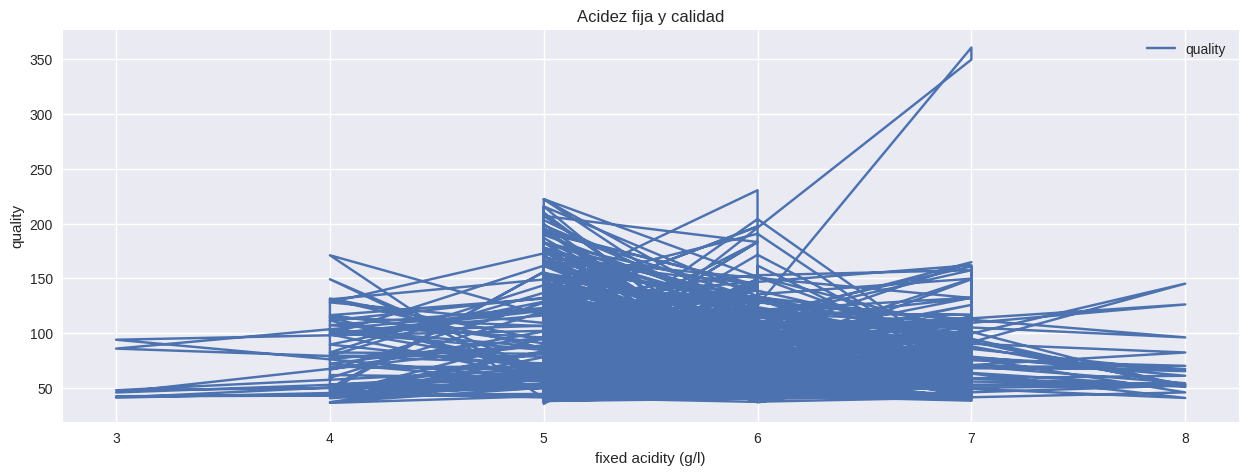

In [97]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(x, y, label='quality')
ax.set_xlabel('fixed acidity (g/l)')
ax.set_ylabel('quality')
ax.set_title('Acidez fija y calidad')
ax.legend()

In [98]:
plt.style.use("bmh")

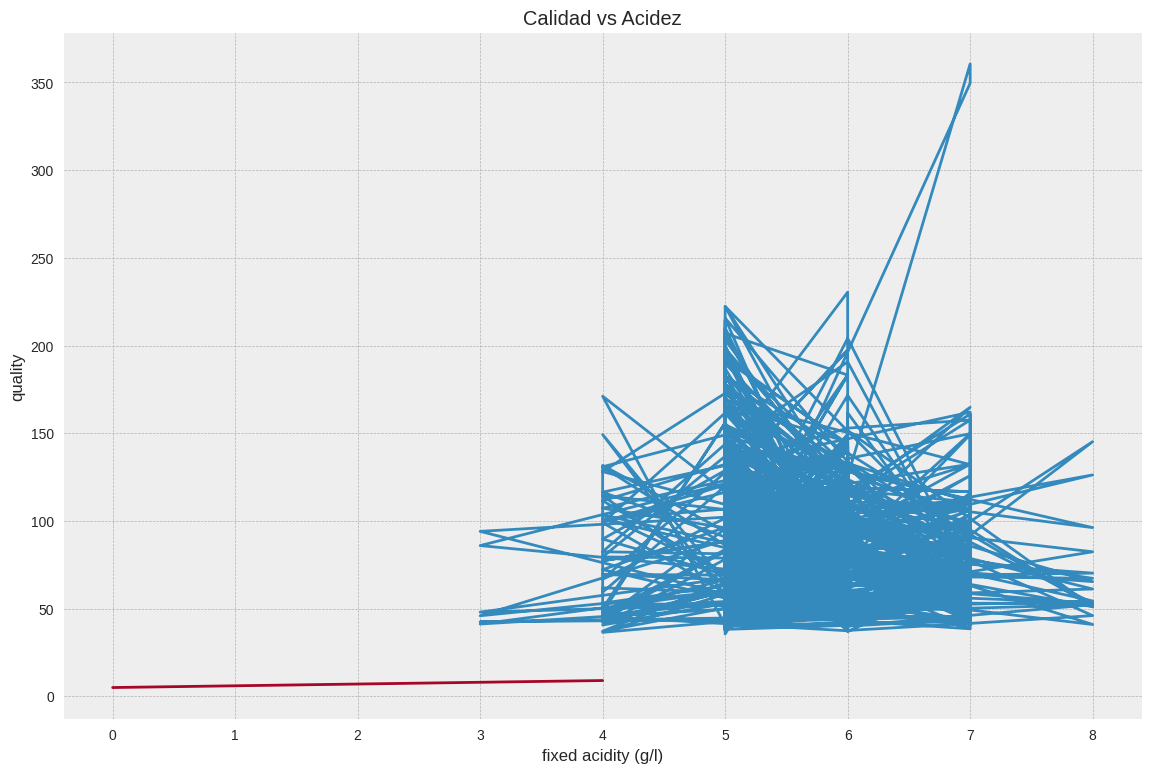

In [99]:
fig, ax = plt.subplots(figsize=(11,7))
ax.plot(x, y, label= 'quality')
ax.set_xlabel('fixed acidity (g/l)')
ax.set_ylabel('quality')
ax.set_title('Calidad vs Acidez')

ax.plot([0,4],[5,9])

In [ ]:
mpl.style.use('seaborn')

<ipython-input-78-2f1545674514>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  mpl.style.use('seaborn')


In [ ]:
import matplotlib.pyplot as plt

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [101]:
plt.style.use("fivethirtyeight")

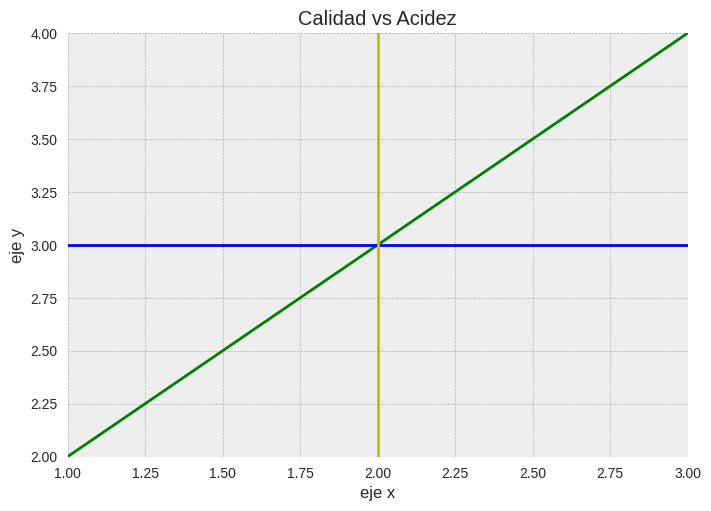

In [ ]:
fig, ax = plt.subplots()
ax.plot([1,3],[2,4], color='g')

ax.set_ylim([2,4])
ax.set_xlim([1,3])
ax.set_xlabel('eje x')
ax.set_ylabel('eje y')
ax.set_title('Calidad vs Acidez')
ax.axhline(y=3, xmin=0, xmax=4, color='b')
ax.axvline(x=2, ymin=0, ymax=10, color='y')

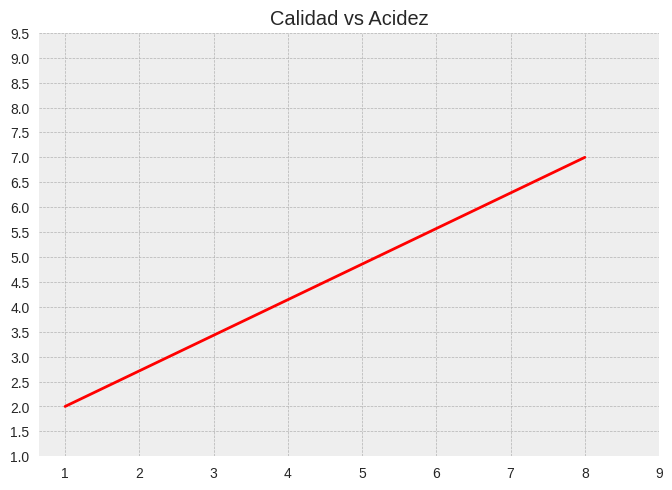

In [ ]:
fix, ax = plt.subplots()
ax.plot([1, 8], [2, 7], color='r')
ax.set_title('Calidad vs Acidez')
ax.set_yticks(np.arange(1.0, 10.0, 0.5))
ax.set_xticks(range(1, 10))
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=11, 8))
ax.plot(x, y, label='calidad del proceso')
ax.set_xlabel('Acidez fijo')
ax.set_ylabel('Acidez acumulada (PH.)')
ax.set_title('Acidez cítrica')
ax.legend()


SyntaxError: unmatched ')' (<ipython-input-88-0cfaa9aa4a6a>, line 1)

In [ ]:
plt.style.use("fivethirtyeight")

Text(2, 1, 'Acidez acumulada')

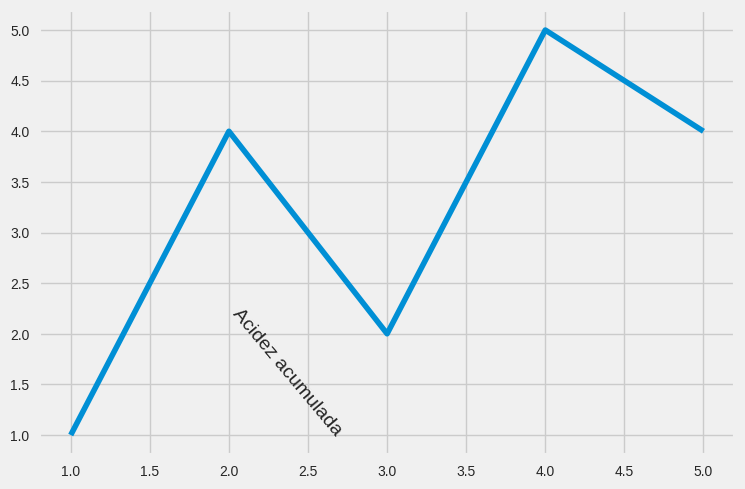

In [ ]:
import seaborn as sns

# Gráfico
ax = sns.lineplot(x = [1, 2, 3, 4, 5],
                  y = [1, 4, 2, 5, 4])

# Anotación de texto en el punto x = 2, y = 1
ax.text(2, 1, "Acidez acumulada",
       rotation = -50)

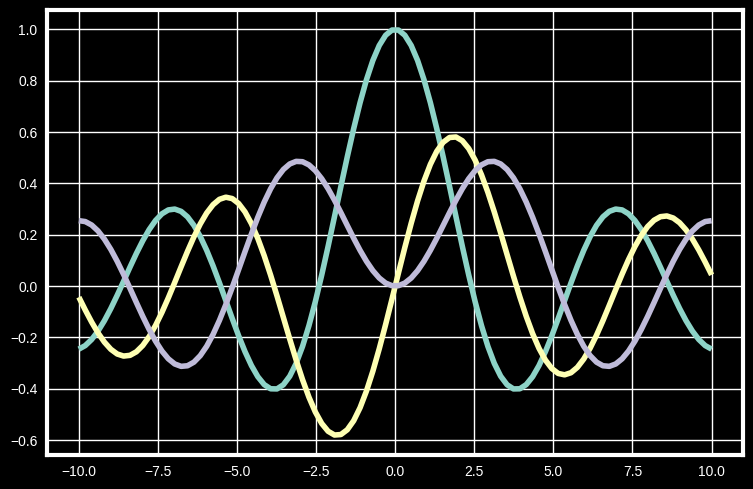

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jv

with plt.style.context("dark_background"):

  fig, ax = plt.subplots()
  x = np.linspace(-10, 10, 100)

  for i in range(0, 3):
    J = jv(i, x)
    ax.plot(x, J)

In [ ]:
#pip install mlxtend -- upgrade -- no deps
import pandas as pd
import numpy as np
#para montar en drive
from google.colab import drive
import os
#drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
#print(os.getcwd())
#os.chdir("/content/gdrive/My Drive")

In [ ]:

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from mlxtend.plotting import category_scatter
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Load data from a file called 'data.csv' into a Pandas DataFrame
url='https://raw.githubusercontent.com/Carocschall/CoderHouse/main/WineQT.csv'
df= pd.read_csv(url,sep=',', header=None)
df.head()
X = df.drop('pH', axis=1)
y = df['quality']
# ajustar arbol de decisión simple con hiperparametros (defecto)
clf = DecisionTreeClassifier(random_state=1234)
model = clf.fit(X, y)
# Graficando
fig = plt.figure(figsize=())
_ = tree.plot_tree(clf_feature_names= feature_names,
                   class_names=acidity,
                   filled=True)

KeyError: "['pH'] not found in axis"

KeyError: 'quality'

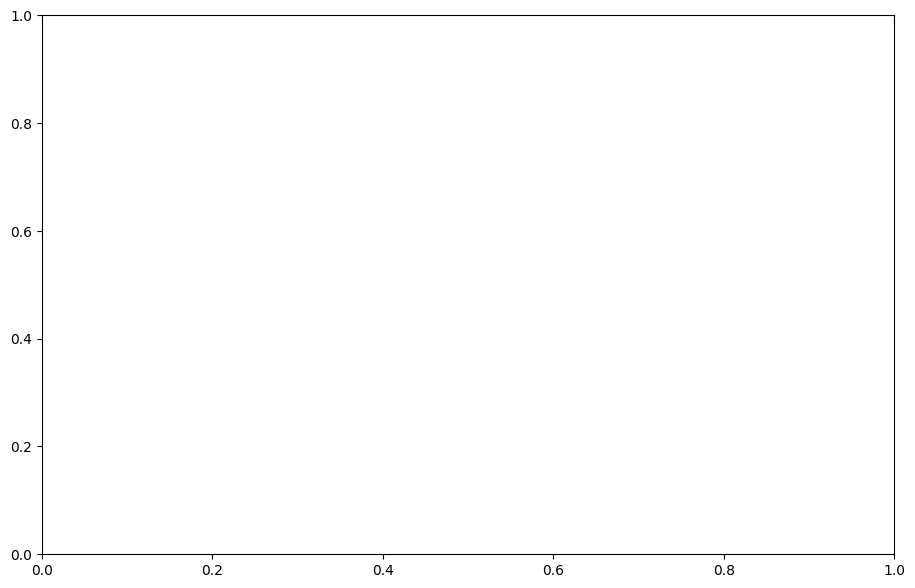

In [ ]:
fig, ax = plt.subplots(figsize=(11,7))
ax.scatter(df[df['quality']=='pH']['citric acid'], df[df['quality']--'volatile acidity']['fixed acidty'], alpha=0-10)
ax.scatter(df[df['quality']=='alcohol']['density'], df[df['quality']--'residual sugar']['chlorides'], alpha=0-10)
ax.set_title('Comparativa de la calidad del vino con sus características')
ax.set_xlabel('pH')
ax.set_ylabel('alcohol')
ax.legend(['quality', 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'density', 'alcohol', 'pH'], loc='upper left')

